# **Tutorial on Text as Data**: Natural Language Processing

Source:  [https://github.com/d-insight/code-bank.git](https://github.com/d-insight/code-bank.git)  
License: [MIT License](https://opensource.org/licenses/MIT). See open source [license](LICENSE) in the Code Bank repository. 

---

### Overview

When dealing with text data, we can look at it under different perspectives. We can, for instance, look at a single sentence to study and capture the linguistic level. This include for instance finding named entities (named entity recognition) or finding part of speeech tags (verb, adverb, ...). 

Another approach is to consider the whole document as a single entity and look for similar documents, one simple solution being count the words that documents share in commons. This action is equivalent to represent a document as a vector and compute distances between vectors.

## Part 1: NLP with spaCy

We already used spaCy ([spacy.io](https://spacy.io/)) in the previous notebook to tokenize the text and find the stopwords. spaCy's catchphrase is "Industrial strength NLP in Python". spaCy is known to be fast and simple to use.

Spacy can help to answer these questions:
 - What this text is talking about?
 - What do the words mean in this context?
 - What companies and products are mentioned?
    
The main features of spaCy are:
 - Tokenization
 - Part-of-speech (POS) Tagging. The action to assign word types to tokens, like verb or noun.
 - Dependency Parsing. A tool to describe relations between individual tokens (see next).
 - Named Entity Recognition. Find entities such as person name or firm name in a text.

Resources: 
 - [spaCy 101](https://spacy.io/usage/spacy-101), the official getting-started tutorial. 

Q1: Load the `review_clean.csv` CSV file into a Pandas DataFrame `df` and display the first 5 reviews.

In [1]:
import numpy as np
# Fix random seed for reproducibility
np.random.seed(42)

import pandas as pd
df = pd.read_csv("./data/review_clean.csv")
df.head(2)

,text_clean,text,stars,categories,name,address
0,Omar great ! diagnose correct cell phone issu...,Omar is great! He can diagnose and correct an...,5.0,"Mobile Phones, Shopping, Telecommunications, M...",T-Mobile,"16635 N Tatum Blvd, Ste 110"
1,TERRIBLE ! ! ! went salon close proximity waxi...,TERRIBLE!!! I went to this salon due to its cl...,1.0,"Day Spas, Beauty & Spas, Nail Salons",Pretty Nails,1660 E Camelback Rd


Q2: Store in a `first_review` variable the first review and display it on screen.

In [2]:
first_review = df.iloc[0]['text']
first_review

'Omar is great!  He can diagnose and correct any cell phone issue - professional and patient - ideal for buyers/customers with limited technology knowledge.  Thank you Omar for all your help.  Jana and Lorraine'

Part of speech (POS) tagging is the process of assigning grammatical properties (noun, verb, adjective, adverb,  etc.) to words. spaCy models use both the definition of the words and its context to determine the right tag.  

Q3: Using spaCy, apply POS tagging to the first and look at the results. What is the part of speech tag for the `-` token? What about `phone` and `Jana`?

> ☝️At line 11 we are overwriting the default printing function with another one from the [rich](https://github.com/willmcgugan/rich) library. This allows to pretty print the data.

In [3]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(first_review)

pos = []

for token in doc:
    pos.append({'text': token.text, 'pos': token.pos_})

from rich import print
print(pos[-10:])

Q4: Using [spaCy visualizer](https://spacy.io/usage/visualizers), display the dependency parse tree of the first sentence of the first review.

In [4]:
first_sentence = first_review.split('.')[0]

print(f"First sentence is: {first_sentence}")

doc = nlp(first_sentence)

from spacy import displacy
displacy.render(doc, style="dep")

Q5: Using the spaCy recognizer, look at the named entities of the first and second reviews. Which information can you get it out of it? Can you use a similar function in your daily job?

In [5]:
doc = nlp(first_review)
displacy.render(doc, style="ent")

In [6]:
second_review = df.iloc[1]['text']
doc = nlp(second_review)
displacy.render(doc, style="ent")

## Part 2: Vector Space

As machines cannot understand human languages as we do, we are required to somehow transform text data into a numeric format. The idea is to _map_ every review to a numeric vector.

Q1 (**theory**): You just received 10 thousands new contracts. You need to categorize them in 10 different sub-categories in an efficient way. What do you do? You don't have access to any information a priori, neither your data have some metadata nor labels. Describe in layman terms how you would proceed.

**Answers**

1. Count the word occurrence in each document and create a document-term matrix count.
1. Apply a clustering algorithm such as k-means (with k = 10 in this case) and find the different clusters.

Q2: [Texthero](https://texthero.org/) is a simple toolkit to preprocess and analyze text-based dataset. Texthero is still in beta and therefore some parts might change in future releases.

With the aid of Texthero, represent each reviews by counting words. Select only the first 500 most common words.

If you need help, you can have a look at the [getting-started](https://texthero.org/docs/getting-started) tutorial.

In [7]:
import texthero as hero

df['count'] = hero.term_frequency(df['text'], max_features=500)
df['count']

0       [1.0786730164551569e-06, 0.0, 0.0, 0.0, 0.0, 0...
1       [3.2360190493654706e-06, 1.0786730164551569e-0...
2       [1.0786730164551569e-06, 0.0, 0.0, 0.0, 0.0, 0...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
9995    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.157...
9996    [2.1573460329103137e-06, 0.0, 0.0, 0.0, 0.0, 0...
9997    [2.1573460329103137e-06, 0.0, 0.0, 0.0, 0.0, 0...
9998    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.393...
9999    [1.0786730164551569e-06, 0.0, 0.0, 0.0, 0.0, 0...
Name: count, Length: 10000, dtype: object

Q3: By applying principal component analysis, reduce the dimension of the vector space to two.

In [8]:
df['pca'] = hero.pca(df['count'])
df['pca']

0       [-1.0552105974899915e-05, -7.845612696765216e-08]
1           [9.68835954094639e-06, 3.535683470181146e-06]
2       [-7.328425866057378e-06, -1.9251148142681786e-07]
3         [-5.47183183103727e-06, 4.0047640298874636e-06]
4          [-6.46380090679118e-06, 6.603223250997151e-07]
                              ...                        
9995    [-1.7417615135114235e-06, -1.3869544943136221e...
9996      [1.6474215598283392e-06, 2.092377231156873e-06]
9997    [-2.6614955516773205e-06, 1.4300148152023345e-06]
9998       [8.840701500299935e-06, 3.396055568166724e-06]
9999      [3.631183913986381e-06, -5.733804326176367e-06]
Name: pca, Length: 10000, dtype: object

Q4: Visualize the obtained vector space, can you identify any pattern?

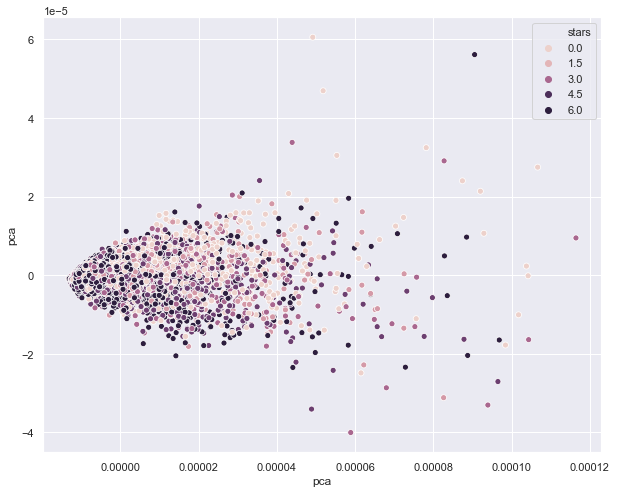

In [9]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10, 8


import seaborn as sns; sns.set()
import seaborn
seaborn.scatterplot(x=df['pca'].str[0], y=df['pca'].str[1], hue=df['stars']);

#hero.scatterplot(df, 'pca', color='stars');

Q5: Find the most similar reviews to the second review. For this, you will need to compute the distance between every review and pick the closet one. You can use the [cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) function from `scikit-learn`.

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

first_review_vector = df['count'].iloc[0]
first_review_vector

cosine_similarity(
            np.asarray(list(df['count'])), np.array(first_review_vector).reshape(1, -1)
        ).reshape(1, -1)[0].argsort()[::-1]

array([   0, 9628, 6330, ..., 6247, 6055,  694])

In [11]:
df.iloc[0]['text']

'Omar is great!  He can diagnose and correct any cell phone issue - professional and patient - ideal for buyers/customers with limited technology knowledge.  Thank you Omar for all your help.  Jana and Lorraine'

In [12]:
df.iloc[9268]['text']

"Awesome experience. They got me in right away on a Saturday and gave me a fair price for a new muffler. The only place I'll go for exhaust work."

In [13]:
df.iloc[694]['text']

'Good store but the cashier was rude saying things under her breath when my mom just wanted to make an exchange'

## Part 3: Topic modelling


Topic modeling is a unsupervised learning method. The goal is to find group of different document of the same "topic". Topic Models are useful for uncovering hidden structure in a collection of texts. There are two common algorithms: Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA).

There are different python libraries that can be used to compute topic modeling, Gensim and Scikit-learn are very common. Gensim documentation is not always crystal clear and can be complex to use in some scenario. For this part, we will use scikit-learn, in particular [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [LatentDirichletAllocation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html).


Q1: Store into a variable `reviews` all reviews and compute the "review-term" matrix (`review_term_matrix`) using CountVectorizer. Then, display the shape of the obtained matrix. Does it look like what you expected?

> ☝️ For a faster computation, you can limit the number of terms to 500 (`max_features=500`).

> ☝️ Make sure you use the "text_clean" column with stopwords removed (otherwise stopwords will pollute the topics)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

reviews = list(df['text_clean'])

vectorizer = CountVectorizer(max_features=300)
review_term_matrix = vectorizer.fit_transform(reviews)

review_term_matrix.shape

(10000, 300)

Q2: Apply the LDA algorithm to the obtained `review_term_matrix`. You will need to specify the number of topics you want to compute as well as the number of iterations for the LDA algorithm. 

In [15]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, max_iter=10, verbose=1)
lda.fit(review_term_matrix);

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


Q3: The below function `print_top_words` display on screen the top words in each "cluster". Display the most common 15 words for each cluster. What do you notice?  

In [16]:
def print_top_words(scikit_learn_model, feature_names, num_top_words):
    for topic_num, topic in enumerate(scikit_learn_model.components_):
        print(f"Topic #{topic_num}")
        print(" ".join([feature_names[i]
                             for i in topic.argsort()[:-num_top_words - 1:-1]]))
    print()
    
print_top_words(lda, vectorizer.get_feature_names(), 15)

Q4: If you wish, you can play around with the obtained topic modelling by executing this lines of code:

> ☝️[PyLDAvis](https://github.com/bmabey/pyLDAvis) is a beautiful and simple library to visualize topic models

In [17]:
import pyLDAvis
import pyLDAvis.sklearn

# topic_vis_data = pyLDAvis.sklearn.prepare(lda, review_term_matrix, vectorizer)
# pyLDAvis.display(topic_vis_data)